#◢ Bringing Old Photos Back to Life

This is a reference implementation of our CVPR 2020 paper [1], which  revives an old photo to modern style. Should you be making use of our work, please cite our paper [1].

#◢ Git clone


In [1]:
import os
os.chdir('/content/')

In [2]:
! rm -rf .config
! rm -rf photo_restoration
! rm -rf .ipynb_checkpoints

In [3]:
!git clone https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life.git photo_restoration

Cloning into 'photo_restoration'...
remote: Enumerating objects: 509, done.
remote: Counting objects: 100% (509/509), done.
remote: Compressing objects: 100% (277/277), done.
remote: Total 509 (delta 238), reused 462 (delta 227), pack-reused 0
Receiving objects: 100% (509/509), 40.89 MiB | 12.57 MiB/s, done.
Resolving deltas: 100% (238/238), done.


#◢ Set up the environment


In [4]:
%cd photo_restoration/Face_Enhancement/models/networks
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../../

%cd Global/detection_models
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../

%cd Face_Detection/
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
%cd ../

%cd Face_Enhancement/
!wget https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life/releases/download/v1.0/face_checkpoints.zip
!unzip face_checkpoints.zip
%cd ../

%cd Global/
!wget https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life/releases/download/v1.0/global_checkpoints.zip
!unzip global_checkpoints.zip
%cd ../

/content/photo_restoration/Face_Enhancement/models/networks
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Receiving objects: 100% (188/188), 47.20 KiB | 15.73 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/photo_restoration
/content/photo_restoration/Global/detection_models
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Receiving objects: 100% (188/188), 47.20 KiB | 15.73 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/photo_restoration
/content/photo_restoration/Face_Detection
--2023-12-19 05:31:29--  http://dlib.net/files/shape_predictor_68_face_landma

In [5]:
! pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.7/512.7 kB 51.8 MB/s eta 0:00:00


#◢ Run the code

### Restore photos (normal mode)

In [6]:
%cd /content/photo_restoration/
input_folder = "test_images/old"
output_folder = "output"

import os
basepath = os.getcwd()
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)
os.mkdir(output_path)

!python run.py --input_folder /content/photo_restoration/test_images/old --output_folder /content/photo_restoration/output/ --GPU 0

/content/photo_restoration
Running Stage 1: Overall restoration
Mapping: You are using the mapping model without global restoration.
Now you are processing a.png
Now you are processing b.png
Now you are processing c.png
Now you are processing d.png
Now you are processing e.png
Now you are processing f.png
Now you are processing g.png
Now you are processing h.png
Finish Stage 1 ...


Running Stage 2: Face Detection
1
1
1
1
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 4 was created
The size of the latent vector size is [8,8]
Network [SPADEGenerator] was created. Total number of parameters: 92.1 million. To see the architecture, do print(network).
hi :)
Finish Stage 3 ...


Running Stage 4: Blending
Traceback (most recent call last):
  File "/content/photo_restoration/Face_Detection/align_warp_back_multiple_dlib.py", line 428, in <module>
    blended = blur_blending_cv2(warped_back, blended, backward_mask)
  File "/content/pho

In [7]:
import io
import IPython.display
import numpy as np
import PIL.Image

def imshow(a, format='png', jpeg_fallback=True):
    a = np.asarray(a, dtype=np.uint8)
    data = io.BytesIO()
    PIL.Image.fromarray(a).save(data, format)
    im_data = data.getvalue()
    try:
      disp = IPython.display.display(IPython.display.Image(im_data))
    except IOError:
      if jpeg_fallback and format != 'jpeg':
        print(('Warning: image was too large to display in format "{}"; '
              'trying jpeg instead.').format(format))
        return imshow(a, format='jpeg')
      else:
        raise
    return disp

def make_grid(I1, I2, resize=True):
    I1 = np.asarray(I1)
    H, W = I1.shape[0], I1.shape[1]

    if I1.ndim >= 3:
        I2 = np.asarray(I2.resize((W,H)))
        I_combine = np.zeros((H,W*2,3))
        I_combine[:,:W,:] = I1[:,:,:3]
        I_combine[:,W:,:] = I2[:,:,:3]
    else:
        I2 = np.asarray(I2.resize((W,H)).convert('L'))
        I_combine = np.zeros((H,W*2))
        I_combine[:,:W] = I1[:,:]
        I_combine[:,W:] = I2[:,:]
    I_combine = PIL.Image.fromarray(np.uint8(I_combine))

    W_base = 600
    if resize:
      ratio = W_base / (W*2)
      H_new = int(H * ratio)
      I_combine = I_combine.resize((W_base, H_new), PIL.Image.LANCZOS)

    return I_combine

a.png


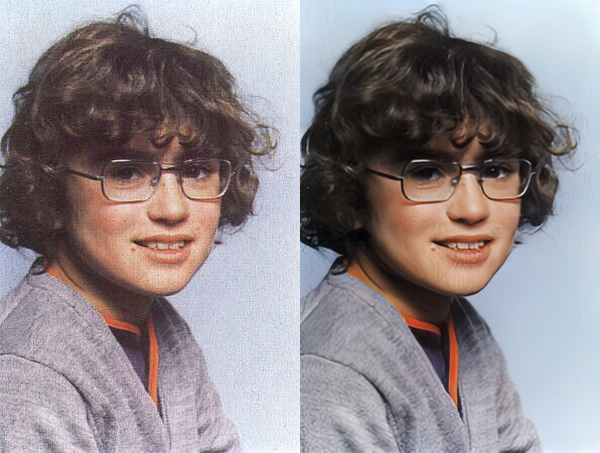

b.png


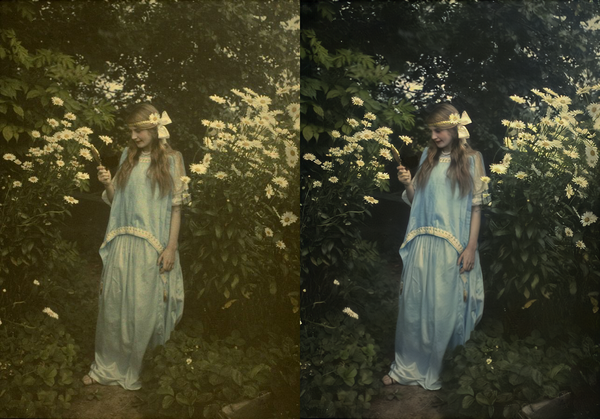

c.png


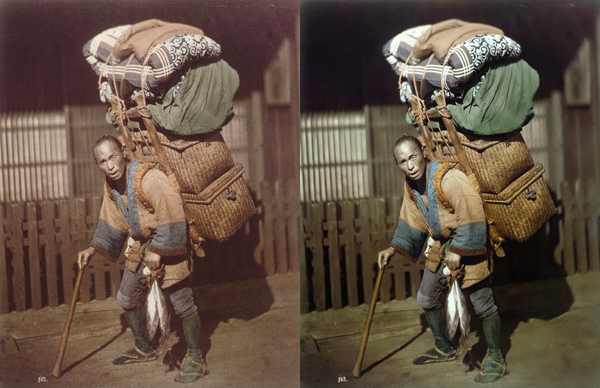

d.png


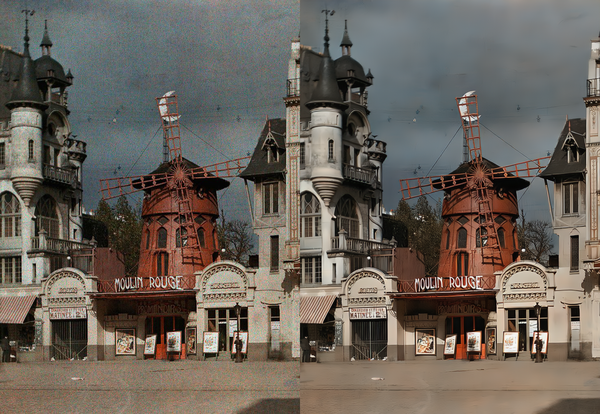

e.png


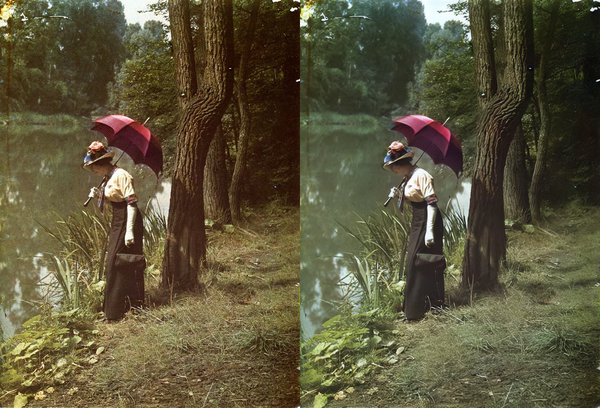

f.png


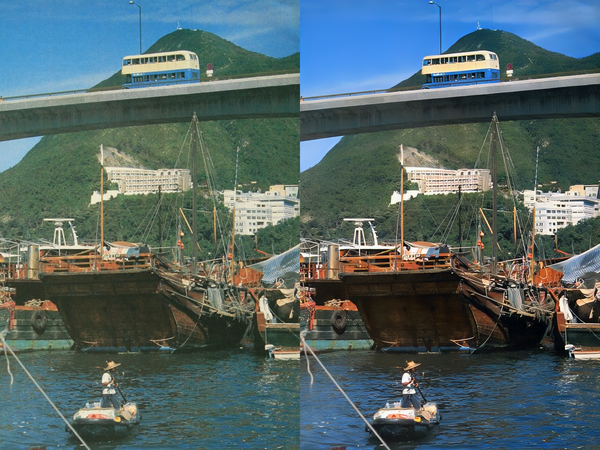

g.png


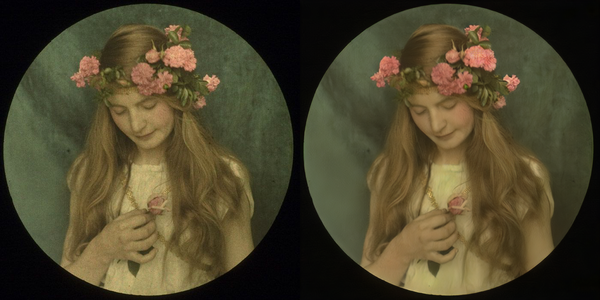

h.png


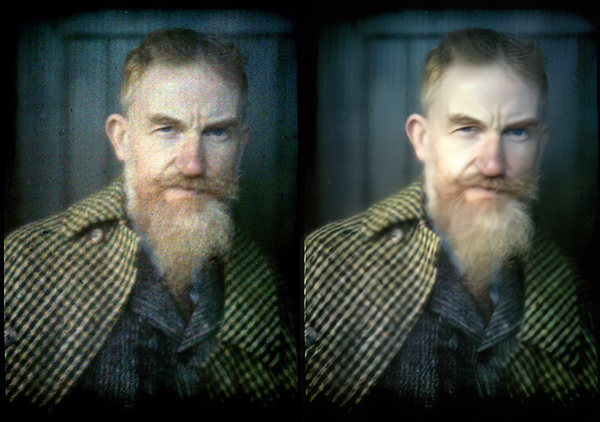

In [8]:
filenames = os.listdir(os.path.join(input_path))
filenames.sort()

for filename in filenames:
    print(filename)
    image_original = PIL.Image.open(os.path.join(input_path, filename))
    image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

    display(make_grid(image_original, image_restore))

### Restore the photos with scratches

In [9]:
!rm -rf /content/photo_restoration/output/*
!python run.py --input_folder /content/photo_restoration/test_images/old_w_scratch/ --output_folder /content/photo_restoration/output/ --GPU 0 --with_scratch

Running Stage 1: Overall restoration
initializing the dataloader
model weights loaded
directory of testing image: /content/photo_restoration/test_images/old_w_scratch
processing a.png
processing b.png
processing c.png
processing d.png
You are using NL + Res
Now you are processing a.png
Now you are processing b.png
Now you are processing c.png
Now you are processing d.png
Finish Stage 1 ...


Running Stage 2: Face Detection
1
1
1
2
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 5 was created
The size of the latent vector size is [8,8]
Network [SPADEGenerator] was created. Total number of parameters: 92.1 million. To see the architecture, do print(network).
hi :)
Finish Stage 3 ...


Running Stage 4: Blending
Traceback (most recent call last):
  File "/content/photo_restoration/Face_Detection/align_warp_back_multiple_dlib.py", line 428, in <module>
    blended = blur_blending_cv2(warped_back, blended, backward_mask)
  File "/co

a.png


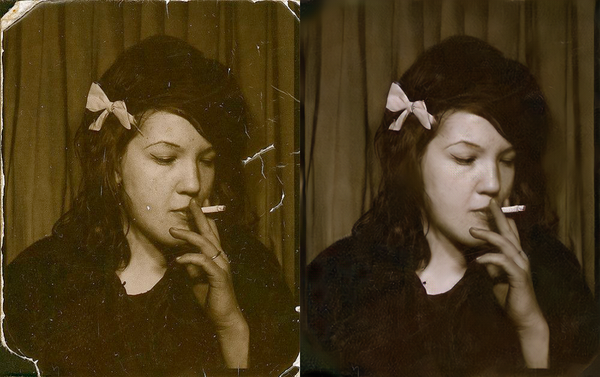

b.png


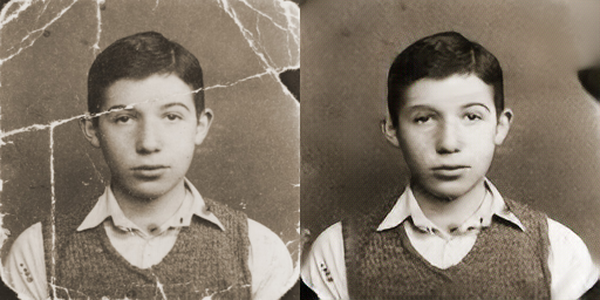

c.png


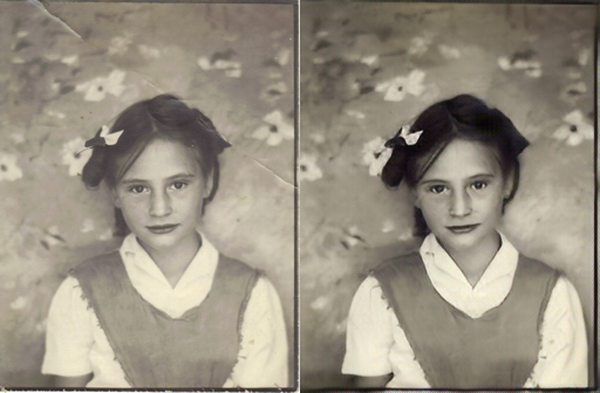

d.png


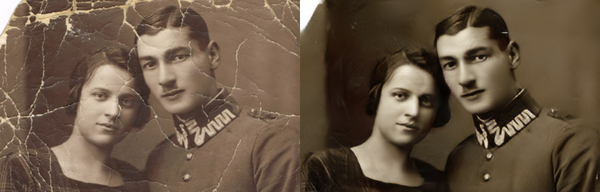

In [10]:
input_folder = "test_images/old_w_scratch"
output_folder = "output"
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)

filenames = os.listdir(os.path.join(input_path))
filenames.sort()

for filename in filenames:
    print(filename)
    image_original = PIL.Image.open(os.path.join(input_path, filename))
    image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

    display(make_grid(image_original, image_restore))

#◢ Try it on your own photos!

In [22]:
from google.colab import files
import shutil

upload_path = os.path.join(basepath, "test_images", "upload")
upload_output_path = os.path.join(basepath, "upload_output")

if os.path.isdir(upload_output_path):
    shutil.rmtree(upload_output_path)

if os.path.isdir(upload_path):
    shutil.rmtree(upload_path)

os.mkdir(upload_output_path)
os.mkdir(upload_path)

uploaded = files.upload()
for filename in uploaded.keys():
    shutil.move(os.path.join(basepath, filename), os.path.join(upload_path, filename))

Saving img.jpg to img.jpg


Run the processing with:

In [26]:
!python run.py --input_folder /content/photo_restoration/test_images/upload --output_folder /content/photo_restoration/upload_output --GPU 0 --HR

Running Stage 1: Overall restoration
Mapping: You are using the mapping model without global restoration.
Now you are processing img.jpg
Finish Stage 1 ...


Running Stage 2: Face Detection
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 0 was created
The size of the latent vector size is [16,16]
Network [SPADEGenerator] was created. Total number of parameters: 92.1 million. To see the architecture, do print(network).
hi :)
Finish Stage 3 ...


Running Stage 4: Blending
Finish Stage 4 ...


All the processing is done. Please check the results.


### Visualize

Now you have all your results under the folder `upload_output` and you can *manually* right click and download them.

Here we use the child photos of celebrities from https://www.boredpanda.com/childhood-celebrities-when-they-were-young-kids/?utm_source=google&utm_medium=organic&utm_campaign=organic

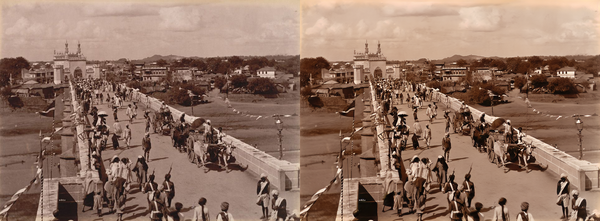

In [27]:
filenames_upload = os.listdir(os.path.join(upload_path))
filenames_upload.sort()

filenames_upload_output = os.listdir(os.path.join(upload_output_path, "final_output"))
filenames_upload_output.sort()

for filename, filename_output in zip(filenames_upload, filenames_upload_output):
    image_original = PIL.Image.open(os.path.join(upload_path, filename))
    image_restore = PIL.Image.open(os.path.join(upload_output_path, "final_output", filename_output))

    display(make_grid(image_original, image_restore))
    print("")

## Download your results



In [25]:
output_folder = os.path.join(upload_output_path, "final_output")
print(output_folder)
os.system(f"zip -r -j download.zip {output_folder}/*")
files.download("download.zip")

/content/photo_restoration/upload_output/final_output


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>